## Datan analysointi K2021 Tehtävät kerta 5

**Opiskelijan nimi:**

Harjoituskerran 5 tehtävistä palautetaan Moodleen tiedosto muodossa **harjoitus5_etunimi_sukunimi.ipynb**. Jokaiseen vastattuun tehtävään tulee ajaa niiden ratkaisut näkyville. Vain ajetut ratkaisut voidaan arvioida. Tehtäväsi arvioidaan pistein:

* 1,0 p. Vastaus on täysin oikein.
* 0,5 p. Vastaus on osittain oikein.
* 0 p. Vastaus on väärin.

**Tehtävissä ei tule käyttää silmukkarakenteita.** Sen sijaan tämän harjoituksen tehtävät kirjoitetaan ilman funktiorakennetta (skripti muodossa). Ratkaisusi on oikein, jos saat saman kuvan kuin esimerkkivastauksessa.



## 1. Säädatan esittäminen

Esitetään säädataa, joka on ladattu [Ilmatieteen laitoksen WFS rajapintapalvelusta](https://www.ilmatieteenlaitos.fi/latauspalvelun-pikaohje). Ennen säädatan esittämistä se tulee käsitellä seuraavasti:
* lataa data DataFrameen url:sta 'https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/saatiedot.csv' ottaen huomioon sarakkeiden erotinmerkin ',' ja desimaalierottimen '.',
* datan ensimmäisessä sarakkeessa (tai indeksissä) on esitetty aika muodossa **vuosi-kuukausi-päivä tunnit:minuutit:sekunnit**,
* muodosta em. aika sarakkeen kaikkia kenttiä (päivämäärä ja kellonkaika) hyödyntämällä uuteen DataFrameen sarake 'aika, s', joka kertoo kuinka paljon aikaa on kulunut sekunteina ensimmäisestä mittaushavainnosta eteenpäin,
* lisää uuteen DataFrameen sarake 'Air temperature, degC',
* tulosta tekemästäsi em. DataFramesta viisi ensimmäistä riviä.

Kun olet käsitellyt datan, tee xy - tasolle seuraavanlainen kuvaaja:
* aika sarakkeesta 'aika, s' on esitetty vaaka-akselilla ja ilman lämpötila sarakkeesta 'Air temperature, degC' on esitetty pystyakselilla,
* em. kuvaajassa datapisteitä on merkitty punaisella pisteellä,
* punaista pistettä esittävälle datalle on merkitty selite (legend), jossa lukee 'ilman lämpötila',
* vaaka-akelin otsikoksi on kirjoitettu 'aika, s' ja pystyakselin otsikoksi 'ilman lämpötila $^{o}C$ ',
* huomaa, että voit akselin otsikkoon voit merkitä fysikaalisen yksikön [TeX syntaksilla](https://en.wikipedia.org/wiki/TeX),
* lisää kuvaajaan ruudukko, jossa on musta katkoviiva.

**Esimerkkikuva:**
<img src="https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/tehtava1.png" width="450"/>


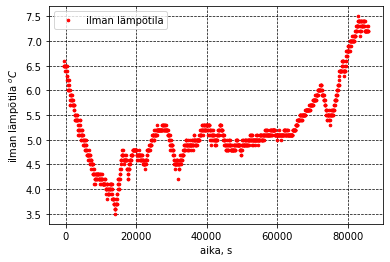

In [2]:
# tarvittavien kirjastojen tuominen
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt

# DATAN KÄSITTELY ------

url = 'https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/saatiedot.csv'
data = pd.read_csv(url,
           sep=',')


# datan ensimmäisessä sarakkeessa (tai indeksissä) on esitetty aika muodossa vuosi-kuukausi-päivä tunnit:minuutit:sekunnit. Muutetaan series datetimeksi
data['Unnamed: 0'] =  pd.to_datetime(data['Unnamed: 0'], format = "%Y-%m-%d %H:%M:00")


# muodosta em. aika sarakkeen kaikkia kenttiä (päivämäärä ja kellonkaika) hyödyntämällä uuteen DataFrameen sarake 'aika, s', joka kertoo kuinka paljon aikaa on kulunut sekunteina ensimmäisestä mittaushavainnosta eteenpäin,
data['aika, s'] = data['Unnamed: 0'].diff().dt.total_seconds().cumsum()


# lisää uuteen DataFrameen sarake 'Air temperature, degC'
dfw = data[['Unnamed: 0','aika, s', 'Air temperature, degC']]



# KUVAAJA ------

def DrawWeather():

    # aika sarakkeesta 'aika, s' on esitetty vaaka-akselilla ja ilman lämpötila sarakkeesta 'Air temperature, degC' on esitetty pystyakselilla
    # punaiset pisteet datapisteiksi
    plt.plot(dfw['aika, s'], dfw['Air temperature, degC'], 'ro', markersize=2.6)
    plt.xlabel('aika, s')

    #vaaka-akelin otsikoksi on kirjoitettu 'aika, s' ja pystyakseldata
    plt.ylabel('ilman lämpötila $^{o}C$')


    # punaista pistettä esittävälle datalle on merkitty selite (legend), jossa lukee 'ilman lämpötila',
    plt.legend(['ilman lämpötila'])


    # lisää kuvaajaan ruudukko, jossa on musta katkoviiva.
    plt.grid(color = 'black', linestyle = '--', linewidth = 0.7)


DrawWeather()


## 2. Säädatan esittäminen (2)

Esitetään säädataa, joka on ladattu [Ilmatieteen laitoksen WFS rajapintapalvelusta](https://www.ilmatieteenlaitos.fi/latauspalvelun-pikaohje). Ennen säädatan esittämistä se tulee käsitellä seuraavasti:
* lataa data DataFrameen url:sta 'https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/saatiedot.csv' ottaen huomioon sarakkeiden erotinmerkin ',' ja desimaalierottimen '.',
* datan ensimmäisessä sarakkeessa (tai indeksissä) on esitetty aika muodossa **vuosi-kuukausi-päivä tunnit:minuutit:sekunnit**,
* muodosta em. aika sarakkeen kaikkia kenttiä (päivämäärä ja kellonkaika) hyödyntämällä uuteen DataFrameen sarake 'aika, s', joka kertoo kuinka paljon aikaa on kulunut sekunteina ensimmäisestä mittaushavainnosta eteenpäin,
* lisää uuteen DataFrameen sarakkeet 'Air temperature, degC' ja 'Wind speed, m/s',
* tulosta tekemästäsi em. DataFramesta viisi ensimmäistä riviä.

Kun olet käsitellyt datan, tee xy - tasolle seuraavanlainen kuvaaja:
* aika sarakkeesta 'aika, s' on esitetty vaaka-akselilla ja ilman lämpötila sarakkeesta 'Air temperature, degC' on esitetty vasemman puoleisella pystyakselilla ja tuulen nopeus sarakkeesta 'Wind speed, m/s' on esitetty oikean puoleisella pystyakselilla,
* em. kuvaajassa datapisteitä ('aika, s','Air temperature, degC') on merkitty punaisella pisteellä ja datapisteitä ('aika, s','Wind speed, m/s') on merkitty sinisellä pisteellä,
* datapisteiden ('aika, s','Air temperature, degC') selite 'ilman lämpötila' (legend) on esitetty kuvassa oikealla alhaalla,
* datapisteiden ('aika, s','Wind speed, m/s') selite 'tuulen nopeus' (legend) on esitetty kuvassa vasemmalla ylhäällä,
* x - akselilla on esitetty aika yksiköissä $\cdot 10^{3}$ s ja x-akselin otsikko on 'aika, $\cdot 10^{3}$ s',
* vasemman puoleisen y-akselin otsikkona on 'ilman lämpötila, $^{o}C$',
* oikean puoleisen y-akselin otsikkona on 'tuulen nopeus, m/s',
* muuta x-akselin asteikkojaotus esimerkkikuvan kaltaiseksi,
* lisää kuvaajaan ruudukko, jossa on musta katkoviiva,
* aseta kuvan taustan väriksi (RGB) '#D7F8FF',
* aseta kuvan otsikoksi 'Säätila Jyväskylän lentoasemalla'.

**Esimerkkikuva:**
<img src="https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/tehtava2.png" width="450"/>

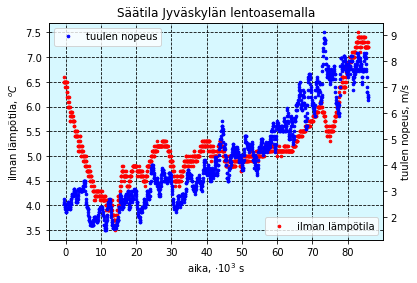

In [3]:
# DATAN KÄSITTELY ------
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt

# lataa data DataFrameen url:sta 'https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/saatiedot.csv' ottaen huomioon sarakkeiden erotinmerkin ',' ja desimaalierottimen '.',

url = 'https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/saatiedot.csv'
data = pd.read_csv(url,
           sep=',')

# datan ensimmäisessä sarakkeessa (tai indeksissä) on esitetty aika muodossa vuosi-kuukausi-päivä tunnit:minuutit:sekunnit. Muutetaan series datetimeksi
data['Unnamed: 0'] =  pd.to_datetime(data['Unnamed: 0'], format = "%Y-%m-%d %H:%M:00")


# muodosta em. aika sarakkeen kaikkia kenttiä (päivämäärä ja kellonkaika) hyödyntämällä uuteen DataFrameen sarake 'aika, s', joka kertoo kuinka paljon aikaa on kulunut sekunteina ensimmäisestä mittaushavainnosta eteenpäin
data['aika, s'] = data['Unnamed: 0'].diff().dt.total_seconds().cumsum()


# lisää uuteen DataFrameen sarakkeet 'Air temperature, degC' ja 'Wind speed, m/s',
df1 = data[['aika, s','Air temperature, degC', 'Wind speed, m/s']]



# KUVAAJA ------

# aika sarakkeesta 'aika, s' on esitetty vaaka-akselilla ja ilman lämpötila sarakkeesta 'Air temperature, degC' on esitetty vasemman puoleisella pystyakselilla ja tuulen nopeus sarakkeesta 'Wind speed, m/s' on esitetty oikean puoleisella pystyakselilla
def DrawWeather2():

    fig, ax1 = plt.subplots()

    plt.title('Säätila Jyväskylän lentoasemalla')

    plt.grid(color = 'black', linestyle = '--', linewidth = 0.8)


    x_ax = df1['aika, s']/1000

    plt.xticks(np.arange(0, 90, 10))

    ax1.set_xlabel('aika, $\cdot 10^{3}$ s')
    ax1.set_ylabel('ilman lämpötila, $^{o}C$')
    ax1.plot(x_ax, df1['Air temperature, degC'], 'ro', markersize=2.6)

    ax2 = ax1.twinx()
    ax2.set_ylabel('tuulen nopeus, m/s')
    ax2.plot(x_ax, df1['Wind speed, m/s'], 'bo', markersize=2.6)

    ax2.legend(['tuulen nopeus'])
    ax1.legend(['ilman lämpötila'], loc=4)

    ax1.set_facecolor('#D7F8FF')
    
DrawWeather2()

## 3. Autodatan esittäminen

#### Datan esikäsittely

- Lataa data DataFrameen [url:sta](https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/autot.csv), kun olet huomioinut sarakkeiden erotinmerkit '\t'.
- Tallenna uuteen DataFrameen vain ne rivit, joissa autonvalmistajalla (sarake 'Mh') on enemmän kuin 50 autoa. 
- Muuta uudessa DataFramessa sarakkeen 'Ft' merkkijonojen 'DIESEL' tilalle 'Diesel' ja 'PETROL' tilalle 'Petrol'. Jos sarakkeessa 'Ft' on merkkijono 'NG', korvaa se merkkijonolla 'Natural gas'.

#### Datan visualisointi

Tee esimerkkikuvan kaltainen kuvaaja, jossa hyödynnät tuottamasi DataFramen sarakkeita autojen polttoainetyypin 'Ft' ja auton valmistajan 'Mh' osalta.

**Esimerkkikuva:**
<img src="https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/tehtava3.png" width="500"/>

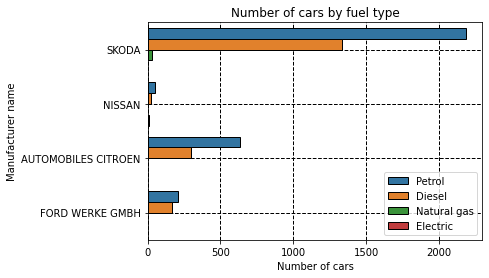

In [4]:
# DATAN KÄSITTELY ------
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/autot.csv'

data_auto = pd.read_csv(url,
           sep='\t')

# Tallenna uuteen DataFrameen vain ne rivit, joissa autonvalmistajalla (sarake 'Mh') on enemmän kuin 50 autoa.
df_auto = data_auto[data_auto['Mh'].isin(data_auto['Mh'].value_counts()[data_auto['Mh'].value_counts() > 50].index)]


df_auto1 = df_auto.copy()
# jos sarakkeessa 'Ft' on merkkijono 'DIESEL', korvataan se merkkijonolla 'Diesel',
df_auto1['Ft'] = df_auto1['Ft'].str.replace('DIESEL', 'Diesel')
# jos sarakkeessa 'Ft' on merkkijono 'PETROL', korvataan se merkkijonolla 'Petrol',
df_auto1['Ft'] = df_auto1['Ft'].str.replace('PETROL', 'Petrol')
# Jos sarakkeessa 'Ft' on merkkijono 'NG', korvaa se merkkijonolla 'Natural gas'.
df_auto1['Ft'] = df_auto1['Ft'].str.replace('NG', 'Natural gas')



# KUVAAJA ------

def DrawCarData():

    ax = sns.countplot(y=df_auto1['Mh'], hue= df_auto1['Ft'], edgecolor="black", linewidth=1, zorder=2)
    ax.grid(True, color = 'black', linestyle = '--', linewidth = 1, zorder=1)
    ax.legend(loc=4)
    ax.set_ylabel('Manufacturer name')
    ax.set_xlabel('Number of cars')
    ax.set_title('Number of cars by fuel type')


DrawCarData()

## 4. Autodatan esittäminen (2)

#### Datan esikäsittely

Lataa data DataFrameen [url:sta](https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/autot.csv), kun olet huomioinut sarakkeiden erotinmerkit '\t'. Tallenna uuteen DataFrameen vain ne rivit, joissa autonvalmistajalla (sarake 'Mh') on enemmän kuin 50 autoa ja sarakkeessa 'Enedc (g/km)' on nollaa suurempia arvoja.

#### Datan visualisointi

Tee esimerkkikuvan kaltainen histogrammi, josta käy ilmi $CO_2$ päästöjen (sarake 'Enedc (g/km)') jakautuminen 100 eri lukualuevälin mukaan sekä kumulatiivinen histogrammi $CO_2$ päästöistä (sarake 'Enedc (g/km)'). Otathan huomioon logaritmisen asteikon todennäköisyystiheysjakaumille.

**Esimerkkikuva:**
<img src="https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/tehtava4.png" width="500"/>


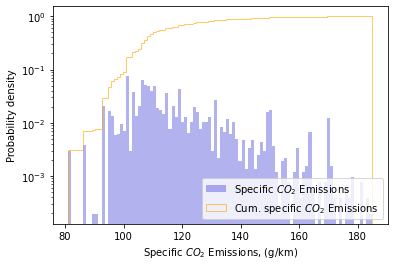

In [5]:
# DATAN KÄSITTELY ------
import numpy as np
from scipy.stats import norm

url = 'https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/autot.csv'

data = pd.read_csv(url, sep='\t')

# Tallenna uuteen DataFrameen vain ne rivit, joissa autonvalmistajalla (sarake 'Mh') on enemmän kuin 50 autoa ja sarakkeessa 'Enedc (g/km)' on nollaa suurempia arvoja.
df = data[data['Mh'].isin(data['Mh'].value_counts()[data['Mh'].value_counts() > 50].index)]
df2 = df[df['Enedc (g/km)'] > 0]


# KUVAAJA ------

def DrawCountEmission():

    values = df2.loc[:,'Enedc (g/km)']
    bins = 100
    fig, ax = plt.subplots()

    # histogrammi datasta
    ax.hist(values, bins=bins, density=True, histtype='stepfilled', log=True, color='mediumblue',
                                                        alpha=0.3, stacked=True, label='Specific $CO_2$ Emissions')


    # kumulatiivinen histogrammi
    n, bins, patches = ax.hist(values, bins=bins, histtype='step',
    cumulative=True, density=True, color='orange', alpha=0.6, stacked=True, label='Cum. specific $CO_2$ Emissions')


    # kuvion otsikointi
    ax.set_ylabel('Probability density')
    ax.set_xlabel('Specific $CO_2$ Emissions, (g/km)')


    # asetetaan legendi
    plt.legend(loc='lower right')

    
DrawCountEmission()


## 5. Useita kuvaajia

Tee tehtävien 1-4 kuvaajat samaan kuvaan alla olevan esimerkkikuvan mukaisesti. Kuvissa tulee säilyä samat tyylit, mutta niiden koko voi muuttua.

**Esimerkkikuva:**
<img src="https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/tehtava5.png" width="1000"/>


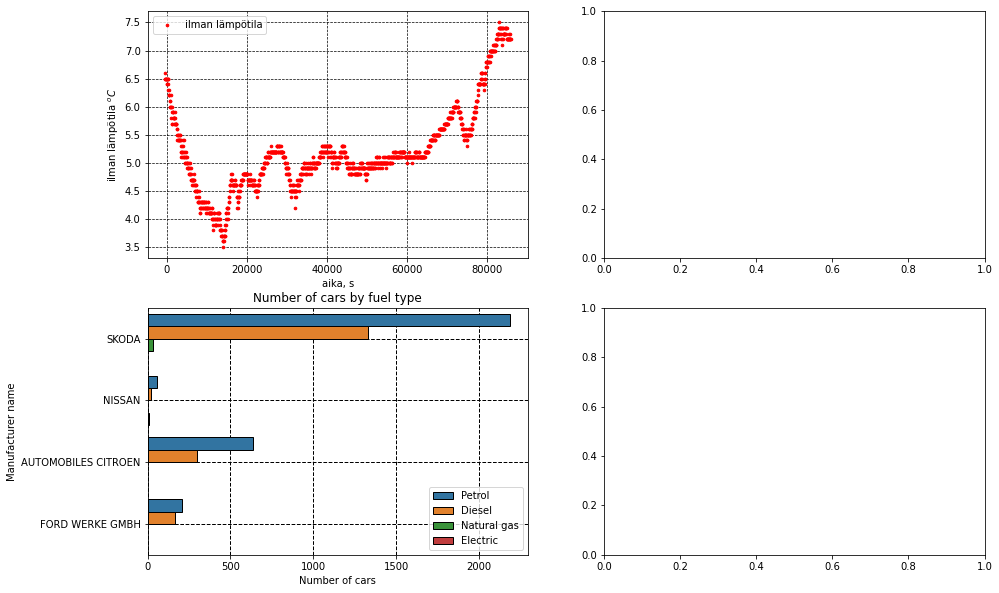

In [8]:
# kaksi kuvaajaa ei suostu asettumaan figureen, joten tämä on osittain tehty tehtävä

fig, axarr = plt.subplots(2, 2, figsize=(15,10), squeeze=False, sharex=False, sharey=False) 

#1 The first subplot
plt.sca(axarr[0, 0])
DrawWeather()

#2 The second subplot
plt.sca(axarr[0, 1])              

#3 The third subplot
plt.sca(axarr[1, 0])                
DrawCarData()

#3 The third subplot
plt.sca(axarr[1, 1])                

